In [1]:
from jittor.dataset.dataset import Dataset
import jittor.transform as transform
import matplotlib.pyplot as plt
import numpy as np
import os

[SYNC][i 0103 16:03:38.050026 00 compiler.py:847] Jittor(1.2.2.13) src: /home/xun18/.pyenv/versions/3.7-dev/lib/python3.7/site-packages/jittor
[SYNC][i 0103 16:03:38.051662 00 compiler.py:848] cache_path: /home/xun18/.cache/jittor/master/g++
[SYNC][i 0103 16:03:38.115837 00 __init__.py:250] Found gdb(8.1.0) at /usr/bin/gdb.
[SYNC][i 0103 16:03:38.127325 00 __init__.py:250] Found addr2line(2.30) at /usr/bin/addr2line.
[SYNC][i 0103 16:03:38.161497 00 compiler.py:897] pybind_include: -I/home/xun18/.pyenv/versions/3.7-dev/include/python3.7m -I/home/xun18/.pyenv/versions/3.7-dev/lib/python3.7/site-packages/pybind11/include
[SYNC][i 0103 16:03:38.178135 00 compiler.py:899] extension_suffix: .cpython-37m-x86_64-linux-gnu.so


[i 0103 16:03:38.041003 80 __init__.py:250] Found g++(7.5.0) at /usr/bin/g++.


[SYNC][i 0103 16:03:38.311940 00 __init__.py:169] Total mem: 12.35GB, using 4 procs for compiling.
[SYNC][i 0103 16:03:38.416441 00 jit_compiler.cc:21] Load cc_path: /usr/bin/g++
[SYNC][i 0103 16:03:38.555549 00 __init__.py:250] Found mpicc(2.1.1) at /usr/bin/mpicc.
[SYNC][i 0103 16:03:38.581621 00 compiler.py:654] handle pyjt_include/home/xun18/.pyenv/versions/3.7-dev/lib/python3.7/site-packages/jittor/extern/mpi/inc/mpi_warper.h


## Prepare Dataset

In [2]:
transform = transform.Compose([
    transform.ToPILImage(),
    transform.RandomHorizontalFlip(),
    transform.ToTensor(),
    transform.ImageNormalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

class SymbolDataset(Dataset):
    def __init__(self, root_path, transform, resolution):
        super().__init__()
        
        resolution_path = os.path.join(root_path, str(resolution))
        train_image = []

        for image_file in os.listdir(resolution_path):
            image_path = os.path.join(resolution_path, image_file)
            if os.path.splitext(image_path)[-1] != '.jpg':
                continue
            image = plt.imread(image_path)
            train_image.append(image)
                
            setattr(self, 'train_image_' + str(resolution), train_image.copy())
            
        self.transform  = transform
        self.resolution = resolution
        
    def __len__(self):
        return len(getattr(self, 'train_image_' + str(self.resolution)))
    
    def __getitem__(self, index):
        X = getattr(self, 'train_image_' + str(self.resolution))[index]
        return self.transform(X)

## Test Dataset

In [29]:
resolutions = [4, 8, 16, 32, 64]
batch_size = 32
root_path = 'color_symbol_7k'
train_loader = SymbolDataset(root_path, transform, 16).set_attrs(batch_size=batch_size, shuffle=True)

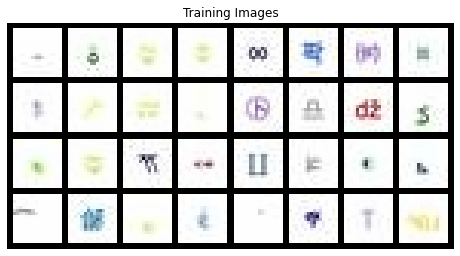

In [30]:
import torchvision.utils
import torch

real_batch = next(iter(train_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(torch.from_numpy(real_batch.numpy()), padding=2, normalize=True),(1,2,0)))